# Description

### Context
Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, The UCI Machine Learning Repository has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".

### Content
"This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers."

### Acknowledgements
Per the UCI Machine Learning Repository, this data was made available by Dr Daqing Chen, Director: Public Analytics group. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK.

### Inspiration
Analyses for this dataset could include time series, clustering, classification and more.

In [2]:
# import important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# use custom function
%run -i 'py/dataframecheck.py'

In [3]:
# import data
df_original = pd.read_csv('./data/data.csv', 
                          encoding = "ISO-8859-1", 
                          dtype = {'InvoiceNo' : str, 'StockCode' : str, 'Description' : str, 'Quantity' : int,
                                   'UnitPrice' : float, 'CustomerID' : str, 'Country' : str})
df_original.head(10)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

      InvoiceDate  UnitPrice CustomerID         Country  
0  12/1/2010 8:26       2.55      17850  United Kingdom  
1  12/1/2010 8:26       3.39      17850  United Kingdom  
2  12/1/2010 8:26       2.75      17850  United Kingdom  
3  12/1/2010 8:26       3.39      17850  United Kingdom  
4  12/1/2010 8:26       3.39      17850  United Kingdom  
5  12/1/2010 8:26       7.65      17850  United Kingdom  
6  12/1/2010 8:26       4.25      17850  United Kingdom  
7  12/1/2010 8:28       1.85      17850  United Kingdom  
8  12/1/2010 8:28       1.85      17850  United Kingdom  
9  12/1/2010 8:34       1.69      13047  United Kingdom

In [4]:
df_original['InvoiceDate'] = pd.to_datetime(df_original['InvoiceDate'])

In [ ]:
# check information about dataframe
sum_info(df_original)

Number of rows: 541909, number of columns: 8


In [6]:
(df_original.isnull().sum().values)/df_original.shape[0]*100

array([ 0.        ,  0.        ,  0.26831073,  0.        ,  0.        ,
        0.        , 24.92669433,  0.        ])

In [7]:
df = df_original
print("Number of rows: {0}, number of columns: {1}".format(df.shape[0], df.shape[1]))
sum_ = pd.DataFrame(df.dtypes, columns=['dtypes'])
sum_ = sum_.reset_index()
sum_['Name'] = sum_['index']
sum_ = sum_[['Name', 'dtypes']]
sum_['Missing'] = df.isnull().sum().values
sum_['Missing_%'] = sum_['Missing']/df.shape[0]*100
sum_['Uniques'] = df.nunique().values
sum_['First Row'] = df.loc[0].values
sum_['Last Row'] = df.loc[df.shape[0]-1].values

Number of rows: 541909, number of columns: 8


In [8]:
sum_

Name          dtypes  Missing  Missing_%  Uniques  \
0    InvoiceNo          object        0   0.000000    25900   
1    StockCode          object        0   0.000000     4070   
2  Description          object     1454   0.268311     4223   
3     Quantity           int64        0   0.000000      722   
4  InvoiceDate  datetime64[ns]        0   0.000000    23260   
5    UnitPrice         float64        0   0.000000     1630   
6   CustomerID          object   135080  24.926694     4372   
7      Country          object        0   0.000000       38   

                            First Row                       Last Row  
0                              536365                         581587  
1                              85123A                          22138  
2  WHITE HANGING HEART T-LIGHT HOLDER  BAKING SET 9 PIECE RETROSPOT   
3                                   6                              3  
4                 2010-12-01 08:26:00            2011-12-09 12:50:00  
5                                2.55                           4.95  
6                               17850                          12680  
7                      United Kingdom                         France

In [9]:
df_original['Country'].nunique()

38

## This dataframe contains 8 columns:

**InvoiceNo:** Invoice number.
**StockCode:** Product (item) code. 

**Description:** Product (item) name.

**Quantity:** The quantities of each product (item) per transaction. 

**InvoiceDate:** Invice Date and time. 

**UnitPrice:** Unit price. 

**CustomerID:** Customer number. 

**Country:** Country name. 

In [10]:
df_original.shape

(541909, 8)

In [8]:
df_original.describe()

Quantity      UnitPrice
count  541909.000000  541909.000000
mean        9.552250       4.611114
std       218.081158      96.759853
min    -80995.000000  -11062.060000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max     80995.000000   38970.000000

In [9]:
import missingno as msno

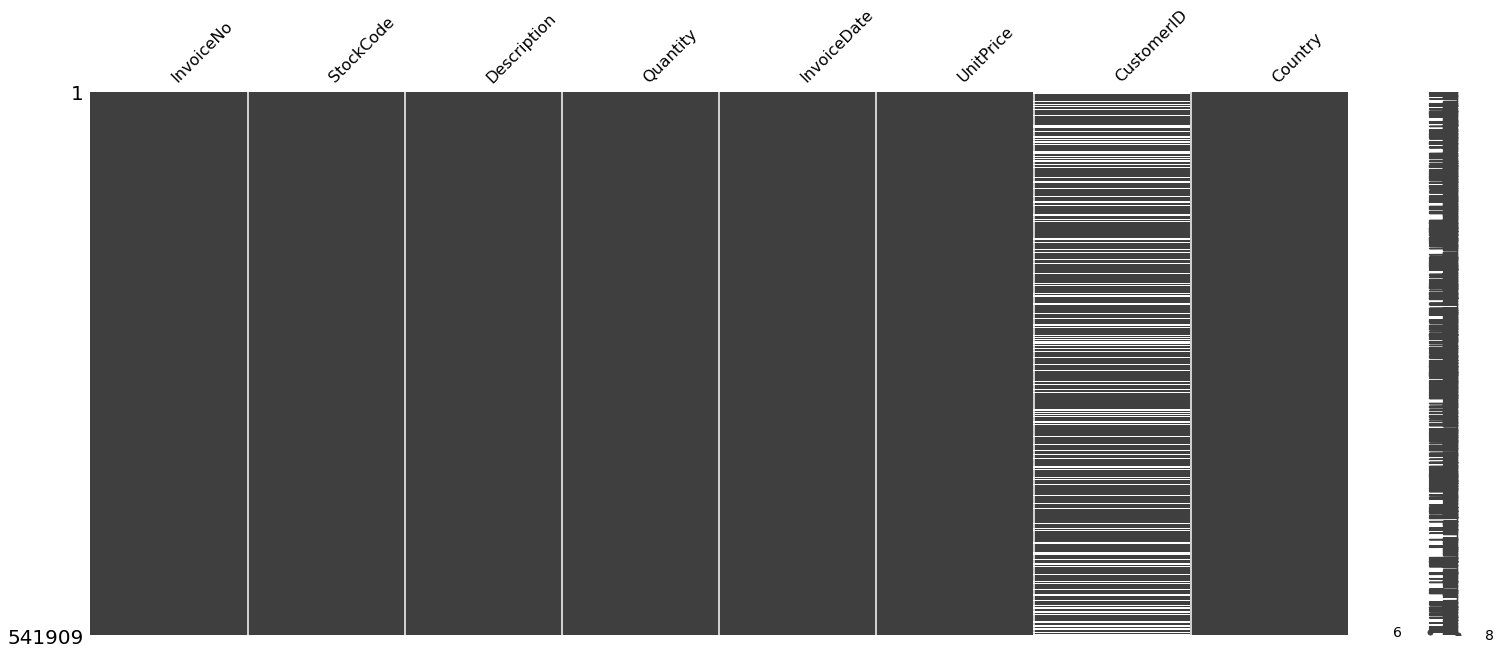

In [10]:
msno.matrix(df_original)

In [11]:
print('Duplicate rows: {}'.format(df_original.duplicated().sum()))

Duplicate rows: 5268


In [14]:
df_clean = df_original

In [26]:
df_clean.dropna(inplace = True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      401604 non-null object
StockCode      401604 non-null object
Description    401604 non-null object
Quantity       401604 non-null int64
InvoiceDate    401604 non-null datetime64[ns]
UnitPrice      401604 non-null float64
CustomerID     401604 non-null object
Country        401604 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.6+ MB


In [17]:
df_clean.drop_duplicates(inplace = False)

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice CustomerID         Country  
0      2010-12-01 08:26:00       2.55      17850  United Kingdom  
1      2010-12-01 08:26:00       3.39      17850  United Kingdom  
2      2010-12-01 08:26:00       2.75      17850  United Kingdom  
3      2010-12-01 08:26:00       3.39      17850  United Kingdom  
4      2010-12-01 08:26:00       3.39      17850  United Kingdom  
...                    ...        ...        ...             ...  
541904 2011-12-09 12:50:00       0.85      12680          France  
541905 2011-12-09 12:50:00       2.10      12680          France  
541906 2011-12-09 12:50:00       4.15      12680          France  
541907 2011-12-09 12:50:00       4.15      12680          France  
541908 2011-12-09 12:50:00       4.95      12680          France  

[401604 rows x 8 columns]

In [18]:
print('Duplicate rows:\n{}'.format(df_clean.isnull().sum()))

Duplicate rows:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [19]:
df_original.dropna(axis = 0, subset = ['CustomerID'], inplace = True)

In [20]:
df_original.shape

(406829, 8)

In [21]:
print('Duplicate rows:\n{}'.format(df_original.isnull().sum()))

Duplicate rows:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [27]:
# Check the date variations in the DataFrame
print("Min Date: {} \t Max Date: {}".format(df_clean['InvoiceDate'].min(), df_clean['InvoiceDate'].max()))

Min Date: 2010-12-01 08:26:00 	 Max Date: 2011-12-09 12:50:00


## Start geo segmentation

In [16]:
df_original[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()

Empty DataFrame
Columns: []
Index: [(12346, 541431, United Kingdom), (12346, C541433, United Kingdom), (12347, 537626, Iceland), (12347, 542237, Iceland), (12347, 549222, Iceland), (12347, 556201, Iceland), (12347, 562032, Iceland), (12347, 573511, Iceland), (12347, 581180, Iceland), (12348, 539318, Finland), (12348, 541998, Finland), (12348, 548955, Finland), (12348, 568172, Finland), (12349, 577609, Italy), (12350, 543037, Norway), (12352, 544156, Norway), (12352, 545323, Norway), (12352, 545332, Norway), (12352, 546869, Norway), (12352, 547390, Norway), (12352, 567505, Norway), (12352, 568699, Norway), (12352, 574275, Norway), (12352, C545329, Norway), (12352, C545330, Norway), (12352, C547388, Norway), (12353, 553900, Bahrain), (12354, 550911, Spain), (12355, 552449, Bahrain), (12356, 541430, Portugal), (12356, 549435, Portugal), (12356, 576895, Portugal), (12357, 574740, Switzerland), (12358, 559707, Austria), (12358, 581232, Austria), (12359, 540946, Cyprus), (12359, 543370, Cyprus), (12359, 555477, Cyprus), (12359, 571034, Cyprus), (12359, C549955, Cyprus), (12359, C580165, Cyprus), (12360, 554132, Austria), (12360, 563749, Austria), (12360, 571705, Austria), (12361, 545017, Belgium), (12362, 544203, Belgium), (12362, 551346, Belgium), (12362, 559295, Belgium), (12362, 563037, Belgium), (12362, 568651, Belgium), (12362, 570667, Belgium), (12362, 572887, Belgium), (12362, 573173, Belgium), (12362, 574329, Belgium), (12362, 580979, Belgium), (12362, C544902, Belgium), (12362, C563752, Belgium), (12362, C579178, Belgium), (12363, 549687, Unspecified), (12363, 563947, Unspecified), (12364, 563854, Belgium), (12364, 567897, Belgium), (12364, 573401, Belgium), (12364, 580152, Belgium), (12365, 544574, Cyprus), (12365, 544578, Cyprus), (12365, C544577, Cyprus), (12367, 580716, Denmark), (12370, 538826, Cyprus), (12370, 539330, Austria), (12370, 546236, Cyprus), (12370, 571905, Cyprus), (12371, 570521, Switzerland), (12371, 572770, Switzerland), (12372, 544157, Denmark), (12372, 552731, Denmark), (12372, 568872, Denmark), (12373, 542887, Austria), (12374, 576345, Austria), (12375, 565333, Finland), (12375, 579281, Finland), (12375, C581071, Finland), (12377, 539488, Switzerland), (12377, 542586, Switzerland), (12378, 562046, Switzerland), (12379, 557789, Belgium), (12379, 567196, Belgium), (12379, C559193, Belgium), (12380, 555739, Belgium), (12380, 567928, Belgium), (12380, 571187, Belgium), (12380, 577180, Belgium), (12380, C572532, Belgium), (12381, 563100, Norway), (12381, 570681, Norway), (12381, 570725, Norway), (12381, 574694, Norway), (12381, 580638, Norway), (12381, C565050, Norway), (12383, 539840, Belgium), ...]

[22190 rows x 0 columns]

In [28]:
countries = df_clean[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()
countries = countries.reset_index(drop = False)
countries['Country'].value_counts()

United Kingdom          19857
Germany                   603
France                    458
EIRE                      319
Belgium                   119
Spain                     105
Netherlands               101
Switzerland                71
Portugal                   70
Australia                  69
Italy                      55
Finland                    48
Sweden                     46
Norway                     40
Channel Islands            33
Japan                      28
Poland                     24
Denmark                    21
Cyprus                     20
Austria                    19
Malta                      10
Singapore                  10
Unspecified                 8
Iceland                     7
USA                         7
Israel                      6
Greece                      6
Canada                      6
European Community          5
Czech Republic              5
Lithuania                   4
United Arab Emirates        3
Bahrain                     2
Saudi Arab

In [29]:
countries_count = countries['Country'].value_counts()
print('How many countries we have: {}'.format(len(countries_count)))

How many countries we have: 37


In [89]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot

data = dict(type='choropleth',
locations = countries_count.index,
locationmode = 'country names', z = countries_count,
text = countries_count.index, colorbar = {'title':'Order nb.'},
colorscale=[[0, 'rgb(0,0,0)'],
            [0.01, 'rgb(64,64,64)'], 
            [0.02, 'rgb(96,96,96)'],
            [0.03, 'rgb(128,128,128)'], 
            [0.05, 'rgb(160,160,160)'],
            [0.10, 'rgb(192,192,192)'], 
            [0.20, 'rgb(224,224,224)'],
            [1, 'rgb(204,255,229)']
],    
reversescale = False)
#_______________________
layout = dict(title='Number of orders per country',
geo = dict(showframe = True, projection={'type':'mercator'}))
#______________
choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)

In [43]:
countries[countries['Country']!= 'United Kingdom']

CustomerID InvoiceNo               Country
2          12347    537626               Iceland
3          12347    542237               Iceland
4          12347    549222               Iceland
5          12347    556201               Iceland
6          12347    562032               Iceland
...          ...       ...                   ...
20468      17828   C576898                 Malta
20469      17828   C578274                 Malta
20470      17828   C579929                 Malta
20471      17829    543911  United Arab Emirates
20668      17844    564428                Canada

[2333 rows x 3 columns]

In [50]:
countries[countries['Country']== 'United Kingdom']['Country'].value_counts()

United Kingdom    19857
Name: Country, dtype: int64

Orders from United Kingdom    19857
Name: Country, dtype: int64


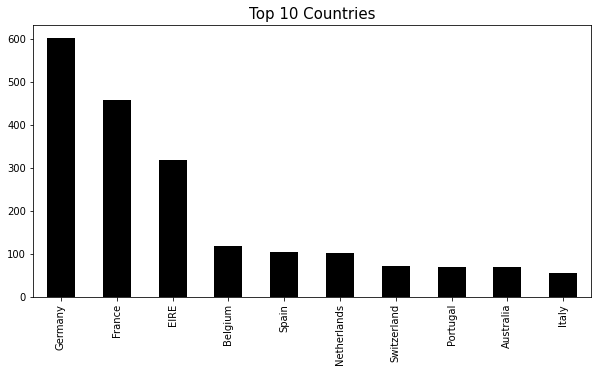

In [69]:
plt.figure(figsize=(10,5))
plt.color = 'k'
print('Orders from {}'.format(countries[countries['Country']== 'United Kingdom']['Country'].value_counts()))
data = countries[countries['Country']!= 'United Kingdom']['Country'].value_counts()
data[:10].plot.bar(color='k')
plt.xticks(rotation=90)
plt.title("Top 10 Countries", size=15)
plt.xlabel(" ")
plt.show()

In [68]:
data

Germany                 603
France                  458
EIRE                    319
Belgium                 119
Spain                   105
Netherlands             101
Switzerland              71
Portugal                 70
Australia                69
Italy                    55
Finland                  48
Sweden                   46
Norway                   40
Channel Islands          33
Japan                    28
Poland                   24
Denmark                  21
Cyprus                   20
Austria                  19
Singapore                10
Malta                    10
Unspecified               8
Iceland                   7
USA                       7
Greece                    6
Israel                    6
Canada                    6
European Community        5
Czech Republic            5
Lithuania                 4
United Arab Emirates      3
Bahrain                   2
Saudi Arabia              2
Lebanon                   1
RSA                       1
Brazil              

In [20]:
print('products quantity: {}'.format(len(df_original['StockCode'].value_counts())))
print('transactions quantity: {}'.format(len(df_original['InvoiceNo'].value_counts())))
print('customers quantity: {}'.format(len(df_original['CustomerID'].value_counts())))

products quantity: 3684
transactions quantity: 22190
customers quantity: 4372


In [21]:
df_original['yearmonth'] = df_original['InvoiceDate'].apply(lambda x: (100*x.year) + x.month)
df_original.head()


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  yearmonth  
0 2010-12-01 08:26:00       2.55      17850  United Kingdom     201012  
1 2010-12-01 08:26:00       3.39      17850  United Kingdom     201012  
2 2010-12-01 08:26:00       2.75      17850  United Kingdom     201012  
3 2010-12-01 08:26:00       3.39      17850  United Kingdom     201012  
4 2010-12-01 08:26:00       3.39      17850  United Kingdom     201012

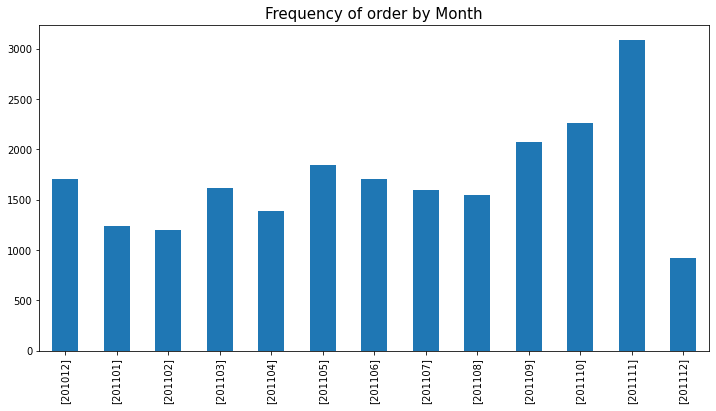

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.title("Frequency of order by Month", fontsize=15)
InvoiceDate = df_original.groupby(['InvoiceNo'])['yearmonth'].unique()
InvoiceDate.value_counts().sort_index().plot.bar()

In [24]:
refunds = df_original[df_original['Quantity']<0]
refunds = refunds.groupby('Description')['Quantity'].count().sort_values(ascending=False).reset_index()[:10]

import seaborn as sns 

plt.figure(figsize=(16,4))
sns.barplot(x= refunds['Description'], y=refunds['Quantity'])
plt.title("Top 10 more frequently returned items", size=15)
plt.xticks(rotation=90)
plt.xlabel(" ")
plt.show()

In [32]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from pyclustering.cluster.cure import cure
from pyclustering.cluster import cluster_visualizer
from pyclustering.samples.definitions import SIMPLE_SAMPLES
from pyclustering.samples.definitions import FCPS_SAMPLES
from pyclustering.utils import read_sample
from pyclustering.utils import timedcall
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from mpl_toolkits import mplot3d
from sklearn import metrics
from sklearn.cluster import DBSCAN
%matplotlib inline

In [31]:
!pip install yellowbrick

     |████████████████████████████████| 269 kB 2.1 MB/s eta 0:00:01
You should consider upgrading via the '/Users/marigaldina/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [36]:
df_original = df_original.dropna().reset_index()
df_original = df_original[df_original.Quantity <=10000]
df_original = df_original[df_original.Quantity >=0]
df_original = df_original.sort_values(['Quantity'],ascending=False)
df_original.shape

(397921, 9)

In [38]:
dfuk = df_original[df_original['Country']=='United Kingdom']

In [39]:
dfukg = (dfuk.groupby(['CustomerID','Country'],as_index=False)
          .agg({'InvoiceNo':'nunique', 'StockCode':'nunique','UnitPrice':'mean','Quantity':'sum'}))
dfukg
dfukg.reset_index()
dfukg['avgitems']=dfukg['Quantity']/dfukg['InvoiceNo']
db = dfukg[['InvoiceNo','UnitPrice','avgitems']]

In [41]:
i=0 
while i<=len(db)-1:
    quartile_1, quartile_3 = np.percentile(db['avgitems'], [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr *1.5 )
    upper_bound = quartile_3 + (iqr *1.5)
    
    if db.loc[i,'avgitems']> upper_bound:
        db.loc[i,'outlier']=1
    elif db.loc[i,'avgitems']< lower_bound:
        db.loc[i,'outlier']=1
    else:
        db.loc[i,'outlier']=0
    i=i+1
    
db

/Users/marigaldina/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/marigaldina/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



InvoiceNo  UnitPrice    avgitems  outlier
0            11   4.367864  115.909091      0.0
1           210   2.655701  122.609524      0.0
2             5   4.999950  294.200000      0.0
3             4   1.904746  180.500000      0.0
4             1   2.498333   70.000000      0.0
...         ...        ...         ...      ...
3914          1   4.765000   45.000000      0.0
3915          1   5.622857   54.000000      0.0
3916          2   5.199167   51.500000      0.0
3917         16   1.614987   87.312500      0.0
3918          3   1.493571  528.666667      1.0

[3919 rows x 4 columns]

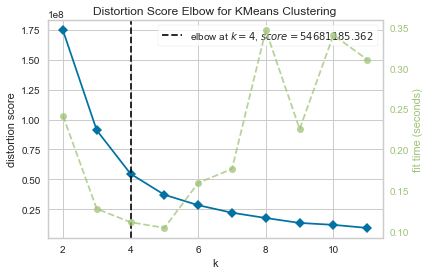

In [42]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(db)  
visualizer.show()    

In [43]:
kmeans = KMeans(5)
kmeans.fit(db)
identified_clusters = kmeans.fit_predict(db)
data_with_clusters = db.copy()
data_with_clusters['Cluster'] = identified_clusters
print(kmeans.cluster_centers_)
print(identified_clusters)

sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(25, 5))
ax = sns.countplot(x="Cluster", data=data_with_clusters)
data_with_clusters.groupby(['Cluster']).count()
fig = plt.figure()
ax = plt.axes(projection='3d')
xline=data_with_clusters['InvoiceNo']
yline=data_with_clusters['avgitems']
zline=data_with_clusters['UnitPrice']

ax.scatter3D(xline, zline,yline,c=data_with_clusters['Cluster'])
ax.view_init(60, 60)

[[ 4.79360000e+00  2.73851962e+00  2.85816911e+02  7.70217223e-16]
 [ 9.82352941e+00  1.41567909e+01  1.60149244e+03  1.00000000e+00]
 [ 4.83193277e+00  2.87106330e+00  6.53693183e+02  7.68907563e-01]
 [ 1.50000000e+00  1.28896875e+00  5.60333333e+03  1.00000000e+00]
 [ 3.82950272e+00  5.38146337e+00  1.04049024e+02 -8.39606162e-16]]
[4 4 0 ... 4 4 2]


In [44]:
fig = plt.figure()
ax = plt.axes(projection='3d')
xline=data_with_clusters['InvoiceNo']
yline=data_with_clusters['avgitems']
zline=data_with_clusters['UnitPrice']

ax.scatter3D(xline, zline,yline,c=data_with_clusters['Cluster'])
ax.view_init(60, 60)

In [45]:
data_with_clusters[data_with_clusters['Cluster']==4]

InvoiceNo  UnitPrice    avgitems  outlier  Cluster
0            11   4.367864  115.909091      0.0        4
1           210   2.655701  122.609524      0.0        4
3             4   1.904746  180.500000      0.0        4
4             1   2.498333   70.000000      0.0        4
6             5   7.650000   46.000000      0.0        4
...         ...        ...         ...      ...      ...
3913          1   3.283333   66.000000      0.0        4
3914          1   4.765000   45.000000      0.0        4
3915          1   5.622857   54.000000      0.0        4
3916          2   5.199167   51.500000      0.0        4
3917         16   1.614987   87.312500      0.0        4

[2393 rows x 5 columns]

# K-Means with normalized data

In [46]:
scaler = StandardScaler()
x_scaled=scaler.fit(db)
x_scaled = scaler.fit_transform(db)
x_scaled

array([[ 9.37013519e-01, -2.50552090e-03, -3.57596183e-01,
        -2.44462745e-01],
       [ 2.85513823e+01, -5.01137027e-02, -3.33171744e-01,
        -2.44462745e-01],
       [ 1.04419486e-01,  1.50701663e-02,  2.92310409e-01,
        -2.44462745e-01],
       ...,
       [-3.11877530e-01,  2.06095645e-02, -5.92380408e-01,
        -2.44462745e-01],
       [ 1.63084188e+00, -7.90516485e-02, -4.61836568e-01,
        -2.44462745e-01],
       [-1.73111858e-01, -8.24277069e-02,  1.14698905e+00,
         4.09060285e+00]])

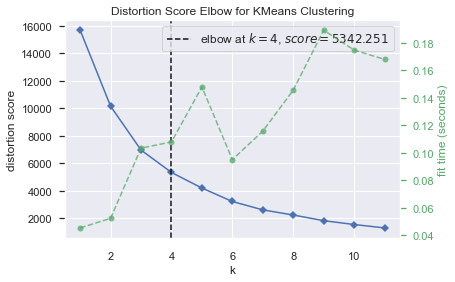

In [47]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(x_scaled)  
visualizer.show()

[4 4 0 ... 4 4 2]
[[ 4.79360000e+00  2.73851962e+00  2.85816911e+02  7.70217223e-16]
 [ 9.82352941e+00  1.41567909e+01  1.60149244e+03  1.00000000e+00]
 [ 4.83193277e+00  2.87106330e+00  6.53693183e+02  7.68907563e-01]
 [ 1.50000000e+00  1.28896875e+00  5.60333333e+03  1.00000000e+00]
 [ 3.82950272e+00  5.38146337e+00  1.04049024e+02 -8.39606162e-16]]


InvoiceNo  UnitPrice  avgitems  outlier
cluster_pred                                         
0                  3644       3644      3644     3644
1                    61         61        61       61
2                   213        213       213      213
3                     1          1         1        1

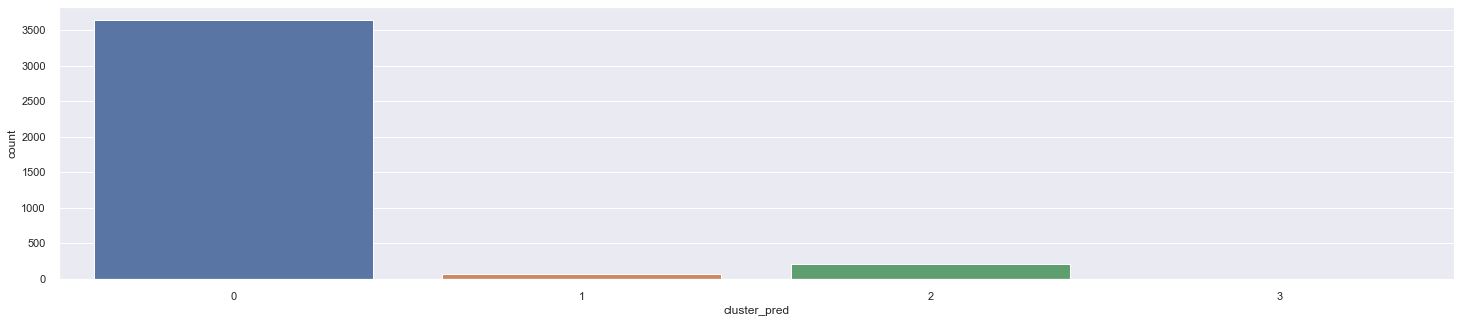

In [48]:
kmeans_scaled = KMeans(4)
kmeans_scaled.fit(x_scaled)
clusters_scaled = db.copy()
clusters_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)
print(identified_clusters)
sns.set(style="darkgrid")
print(kmeans.cluster_centers_)
f, ax = plt.subplots(figsize=(25, 5))
ax = sns.countplot(x="cluster_pred", data=clusters_scaled)
clusters_scaled.groupby(['cluster_pred']).count()

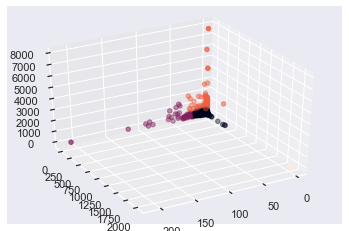

In [49]:
fig = plt.figure()
ax = plt.axes(projection='3d')
xline=clusters_scaled['InvoiceNo']
yline=clusters_scaled['avgitems']
zline=clusters_scaled['UnitPrice']

ax.scatter3D(xline, zline,yline,c=clusters_scaled['cluster_pred'])
ax.view_init(35, 60)

In [17]:
df_original["Revenue"] = df_original.Quantity *df_original.UnitPrice

df_original["Year"] = df_original.InvoiceDate.dt.year
df_original["Quarter"] = df_original.InvoiceDate.dt.quarter
df_original["Month"] = df_original.InvoiceDate.dt.month
df_original["Week"] = df_original.InvoiceDate.dt.week
df_original["Weekday"] = df_original.InvoiceDate.dt.weekday
df_original["Day"] = df_original.InvoiceDate.dt.day
df_original["Dayofyear"] = df_original.InvoiceDate.dt.dayofyear
df_original["Date"] = pd.to_datetime(df_original[['Year', 'Month', 'Day']])

In [18]:
grouped_features = ["Date", "Year", "Quarter","Month", "Week", "Weekday", "Dayofyear", "Day",
                    "StockCode"]

In [19]:
daily_data = pd.DataFrame(df_original.groupby(grouped_features).Quantity.sum(),
                          columns=["Quantity"])
daily_data["Revenue"] = df_original.groupby(grouped_features).Revenue.sum()
daily_data = daily_data.reset_index()
daily_data.head(5)

Date  Year  Quarter  Month  Week  Weekday  Dayofyear  Day StockCode  \
0 2010-12-01  2010        4     12    48        2        335    1     10002   
1 2010-12-01  2010        4     12    48        2        335    1     10125   
2 2010-12-01  2010        4     12    48        2        335    1     10133   
3 2010-12-01  2010        4     12    48        2        335    1     10135   
4 2010-12-01  2010        4     12    48        2        335    1     11001   

   Quantity  Revenue  
0        60    51.00  
1         2     1.70  
2         5     4.25  
3         1     2.51  
4         3    10.08

In [20]:
daily_data.loc[:, ["Quantity", "Revenue"]].describe()

Quantity        Revenue
count  280451.000000  280451.000000
mean       18.457592      34.757401
std        83.486160     205.572589
min    -19172.000000  -39243.080000
25%         2.000000       4.980000
50%         6.000000      14.280000
75%        18.000000      31.030000
max     12540.000000   39673.450000

py/dataframecheck.py:3: RuntimeWarning: divide by zero encountered in log
  sum_ = pd.DataFrame(df.dtypes, columns=['dtypes'])
py/dataframecheck.py:3: RuntimeWarning: invalid value encountered in log
  sum_ = pd.DataFrame(df.dtypes, columns=['dtypes'])


ValueError: supplied range of [-inf, 9.436678814186912] is not finite

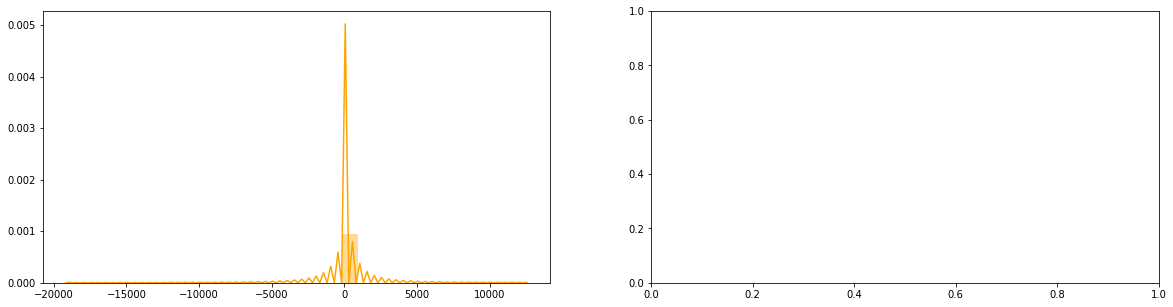

In [21]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(daily_data.Quantity.values, kde=True, ax=ax[0], color="Orange", bins=30);
sns.distplot(np.log(daily_data.Quantity.values), kde=True, ax=ax[1], color="Orange", bins=30);
ax[0].set_xlabel("Number of daily product sales");
ax[0].set_ylabel("Frequency");
ax[0].set_title("How many products are sold per day?");

In [73]:
import datetime as dt
def set_short_data(x):
    return dt.datetime(x.year, x.month, x.day)
df_clean['InvoiceDay'] = df_clean['InvoiceDate'].apply(set_short_data)
grouping = df_clean.groupby('CustomerID')['InvoiceDay'] 
df_clean['Day'] = grouping.transform('min')

df_clean.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country InvoiceDay  \
0 2010-12-01 08:26:00       2.55      17850  United Kingdom 2010-12-01   
1 2010-12-01 08:26:00       3.39      17850  United Kingdom 2010-12-01   
2 2010-12-01 08:26:00       2.75      17850  United Kingdom 2010-12-01   
3 2010-12-01 08:26:00       3.39      17850  United Kingdom 2010-12-01   
4 2010-12-01 08:26:00       3.39      17850  United Kingdom 2010-12-01   

         Day  
0 2010-12-01  
1 2010-12-01  
2 2010-12-01  
3 2010-12-01  
4 2010-12-01

In [74]:
df_clean['Hour'] = df_clean['InvoiceDate'].dt.hour
df_clean['Weekday'] = df_clean['InvoiceDate'].dt.weekday
df_clean['Month'] = df_clean['InvoiceDate'].dt.month
df_clean.head(3)

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   
2    536365    84406B      CREAM CUPID HEARTS COAT HANGER         8   

          InvoiceDate  UnitPrice CustomerID         Country InvoiceDay  \
0 2010-12-01 08:26:00       2.55      17850  United Kingdom 2010-12-01   
1 2010-12-01 08:26:00       3.39      17850  United Kingdom 2010-12-01   
2 2010-12-01 08:26:00       2.75      17850  United Kingdom 2010-12-01   

         Day  Hour  Weekday  Month  
0 2010-12-01     8        2     12  
1 2010-12-01     8        2     12  
2 2010-12-01     8        2     12

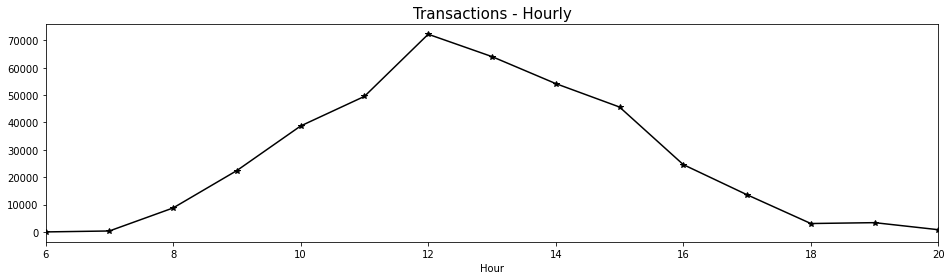

In [82]:
# Transaction trend in hour of the day
hour = df_clean.groupby('Hour')['Quantity'].count()
plt.figure(figsize=(16,4))
hour.plot(marker='*', color='k')
plt.title("Transactions - Hourly", size=15)
plt.show()
# Transaction trend in day of week
weekday = df_clean.groupby('Weekday')['Quantity'].count()
plt.figure(figsize=(16,4))
weekday.plot(marker='*',color='k')
plt.title("Transactions - Day of Week", size=15)
plt.show()
# Transaction trend across months
month = df_clean.groupby('Month')['Quantity'].count()
plt.figure(figsize=(16,4))
month.plot(marker='*',color='k')
plt.title("Transactions - Monthly", size=15)
plt.show()

In [106]:
prod = df_clean.groupby('StockCode')['Quantity'].count().sort_values(ascending=True)

In [107]:
df_clean.StockCode.unique() 

array(['85123A', '71053', '84406B', ..., '90214Z', '90089', '23843'],
      dtype=object)

In [127]:
p = df_clean[df_clean['Quantity']>0]
p = p.groupby('Description')['Quantity'].count().sort_values(ascending=False).reset_index()[:10]

import seaborn as sns 

plt.figure(figsize=(10,5))
sns.barplot(x = p['Description'], y = p['Quantity'], color = 'k')
plt.title("Top 10 more frequently buying items", size=15)
plt.xticks(rotation=90)
plt.xlabel(" ")
plt.show()

In [128]:
df_clean['Total'] = df_clean['Quantity']*df_clean['UnitPrice']
df_clean

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice CustomerID         Country InvoiceDay  \
0      2010-12-01 08:26:00       2.55      17850  United Kingdom 2010-12-01   
1      2010-12-01 08:26:00       3.39      17850  United Kingdom 2010-12-01   
2      2010-12-01 08:26:00       2.75      17850  United Kingdom 2010-12-01   
3      2010-12-01 08:26:00       3.39      17850  United Kingdom 2010-12-01   
4      2010-12-01 08:26:00       3.39      17850  United Kingdom 2010-12-01   
...                    ...        ...        ...             ...        ...   
541904 2011-12-09 12:50:00       0.85      12680          France 2011-12-09   
541905 2011-12-09 12:50:00       2.10      12680          France 2011-12-09   
541906 2011-12-09 12:50:00       4.15      12680          France 2011-12-09   
541907 2011-12-09 12:50:00       4.15      12680          France 2011-12-09   
541908 2011-12-09 12:50:00       4.95      12680          France 2011-12-09   

              Day  Hour  Weekday  Month  Total  
0      2010-12-01     8        2     12  15.30  
1      2010-12-01     8        2     12  20.34  
2      2010-12-01     8        2     12  22.00  
3      2010-12-01     8        2     12  20.34  
4      2010-12-01     8        2     12  20.34  
...           ...   ...      ...    ...    ...  
541904 2011-08-18    12        4     12  10.20  
541905 2011-08-18    12        4     12  12.60  
541906 2011-08-18    12        4     12  16.60  
541907 2011-08-18    12        4     12  16.60  
541908 2011-08-18    12        4     12  14.85  

[401604 rows x 14 columns]

In [133]:
c  = df_clean.groupby('CustomerID')['Total'].count().sort_values(ascending=False)
c[:10]

CustomerID
17841    7812
14911    5898
14096    5128
12748    4459
14606    2759
15311    2478
14646    2085
13089    1853
13263    1667
14298    1640
Name: Total, dtype: int64

In [141]:
c = df_clean.groupby('CustomerID')['Total'].count().sort_values(ascending=False)
c

CustomerID
17841    7812
14911    5898
14096    5128
12748    4459
14606    2759
         ... 
15657       1
18113       1
15668       1
13270       1
17752       1
Name: Total, Length: 4372, dtype: int64

In [134]:
df_clean['Total'].sum()

8278519.4240000015

In [137]:
c[11:21]

CustomerID
14156    1415
18118    1268
14159    1183
14796    1156
15005    1152
16033    1143
14056    1110
17511    1076
14769    1066
13081    1061
Name: Total, dtype: int64

In [144]:
from datetime import timedelta

def RFM_data(df, customerID, invoiceDate, transID, sales):
    latest_date = df[invoiceDate].max() + timedelta(1)
    RFMScores = df.groupby(customerID).agg({invoiceDate: lambda x: (latest_date - x.max()).days, 
                                          transID: lambda x: len(x), 
                                          sales: lambda x: sum(x)})
    RFMScores[invoiceDate] = RFMScores[invoiceDate].astype(int)

    RFMScores.rename(columns={invoiceDate: 'Recency', transID: 'Frequency', sales: 'Monetary'}, inplace=True)
    
    return RFMScores.reset_index()

In [146]:
RFM = RFM_data(df=df_clean, customerID= "CustomerID", invoiceDate = "InvoiceDate", transID= "InvoiceNo", sales="Total")
RFM.head()

CustomerID  Recency  Frequency  Monetary
0      12346      326          2      0.00
1      12347        2        182   4310.00
2      12348       75         31   1797.24
3      12349       19         73   1757.55
4      12350      310         17    334.40

In [148]:
fig, ax = plt.subplots(1,3, figsize=(14,6))

sns.distplot(RFM.Recency, bins=20, ax=ax[0], color = 'k')
sns.distplot(RFM[RFM['Frequency']<1000]['Frequency'], bins=20, ax=ax[1], color = 'k')
sns.distplot(RFM[RFM['Monetary']<10000]['Monetary'], bins=20, ax=ax[2], color = 'k')
plt.show()

In [149]:
# Creating quantiles 
Quantiles = RFM[['Recency', 'Frequency', 'Monetary']].quantile([0.25, 0.50, 0.75])
Quantiles = Quantiles.to_dict()
Quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 143.0},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.25},
 'Monetary': {0.25: 291.79499999999996,
  0.5: 644.0700000000002,
  0.75: 1608.335}}

In [150]:
# Creating RFM ranks
def RFMRanking(x, variable, quantile_dict):
    ''' Ranking the Recency, Frequency, and Monetary features based on quantile values '''
    
    # checking if the feature to rank is Recency
    if variable == 'Recency':
        if x <= quantile_dict[variable][0.25]:
            return 4
        elif (x > quantile_dict[variable][0.25]) & (x <= quantile_dict[variable][0.5]):
            return 3
        elif (x > quantile_dict[variable][0.5]) & (x <= quantile_dict[variable][0.75]):
            return 2
        else:
            return 1
    
    # checking if the feature to rank is Frequency and Monetary
    if variable in ('Frequency','Monetary'):
        if x <= quantile_dict[variable][0.25]:
            return 1
        elif (x > quantile_dict[variable][0.25]) & (x <= quantile_dict[variable][0.5]):
            return 2
        elif (x > quantile_dict[variable][0.5]) & (x <= quantile_dict[variable][0.75]):
            return 3
        else:
            return 4


In [151]:
RFM['R'] = RFM['Recency'].apply(lambda x: RFMRanking(x, variable='Recency', quantile_dict=Quantiles))
RFM['F'] = RFM['Frequency'].apply(lambda x: RFMRanking(x, variable='Frequency', quantile_dict=Quantiles))
RFM['M'] = RFM['Monetary'].apply(lambda x: RFMRanking(x, variable='Monetary', quantile_dict=Quantiles))

In [152]:
RFM.head()

CustomerID  Recency  Frequency  Monetary  R  F  M
0      12346      326          2      0.00  1  1  1
1      12347        2        182   4310.00  4  4  4
2      12348       75         31   1797.24  2  2  4
3      12349       19         73   1757.55  3  3  4
4      12350      310         17    334.40  1  1  2

In [153]:
RFM['Group'] = RFM['R'].apply(str) + RFM['F'].apply(str) + RFM['M'].apply(str)
RFM.head()

CustomerID  Recency  Frequency  Monetary  R  F  M Group
0      12346      326          2      0.00  1  1  1   111
1      12347        2        182   4310.00  4  4  4   444
2      12348       75         31   1797.24  2  2  4   224
3      12349       19         73   1757.55  3  3  4   334
4      12350      310         17    334.40  1  1  2   112

In [154]:
# Check the number of score segments
RFM.Group.value_counts()

444    470
111    393
344    210
122    204
211    181
      ... 
124      6
414      3
142      3
441      1
241      1
Name: Group, Length: 62, dtype: int64

In [155]:
RFM["Score"] = RFM[['R', 'F', 'M']].sum(axis=1)
RFM.head()

CustomerID  Recency  Frequency  Monetary  R  F  M Group  Score
0      12346      326          2      0.00  1  1  1   111      3
1      12347        2        182   4310.00  4  4  4   444     12
2      12348       75         31   1797.24  2  2  4   224      8
3      12349       19         73   1757.55  3  3  4   334     10
4      12350      310         17    334.40  1  1  2   112      4

In [156]:
# Loyalty levels
loyalty = ['Bronze', 'Silver', 'Gold', 'Platinum']
RFM['Loyalty_Level'] = pd.qcut(RFM['Score'], q=4, labels= loyalty)
RFM.head()

CustomerID  Recency  Frequency  Monetary  R  F  M Group  Score Loyalty_Level
0      12346      326          2      0.00  1  1  1   111      3        Bronze
1      12347        2        182   4310.00  4  4  4   444     12      Platinum
2      12348       75         31   1797.24  2  2  4   224      8          Gold
3      12349       19         73   1757.55  3  3  4   334     10          Gold
4      12350      310         17    334.40  1  1  2   112      4        Bronze

In [160]:
behaviour = RFM.groupby('Loyalty_Level')[['Recency', 'Frequency', 'Monetary', 'Score']].mean()
behaviour

Recency   Frequency     Monetary      Score
Loyalty_Level                                                
Bronze         193.211094   14.821263   237.120394   4.093991
Silver          87.294053   33.480176   602.899428   6.483480
Gold            46.571861   81.633132  1368.413511   8.981089
Platinum        12.809242  289.155213  6651.968969  11.556872

In [161]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 10 columns):
CustomerID       4372 non-null object
Recency          4372 non-null int64
Frequency        4372 non-null int64
Monetary         4372 non-null float64
R                4372 non-null int64
F                4372 non-null int64
M                4372 non-null int64
Group            4372 non-null object
Score            4372 non-null int64
Loyalty_Level    4372 non-null category
dtypes: category(1), float64(1), int64(6), object(2)
memory usage: 312.0+ KB


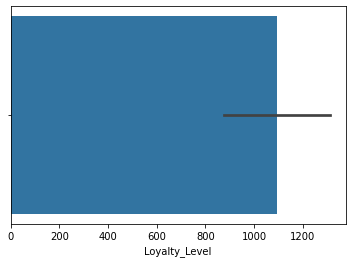

In [164]:
sns.barplot(RFM['Loyalty_Level'].value_counts())

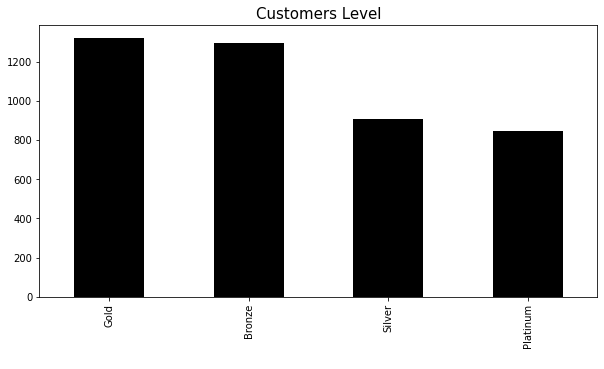

In [170]:
plt.figure(figsize=(10,5))
plt.color = 'k'
data = RFM['Loyalty_Level'].value_counts()
data.plot.bar(color='k')
plt.xticks(rotation=90)
plt.title("Customers Level", size=15)
plt.xlabel(" ")
plt.show()